# Introduction to Pandas

## 1. Reading data

In [147]:
#From a csv file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)

%matplotlib inline
%run plot_learning_curve

df = pd.read_csv('../data-titanic/train.csv')
print(df.shape)
df.head(5)

ERROR:root:File `'plot_learning_curve.py'` not found.


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Preprocessing

### 2.1 Data munging

#### 2.1.1 Examining de DF

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
df.duplicated().any()

False

In [151]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### 2.1.2 Feature engineering

##### Age

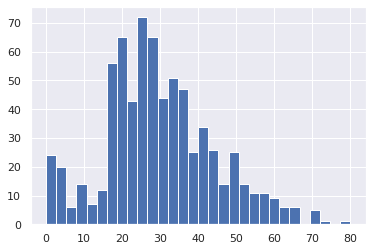

In [153]:
#Histogram of "Ages"
df['Age'].hist(bins=30, range=(0, df['Age'].max()))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0724889470>,
      dtype=object)

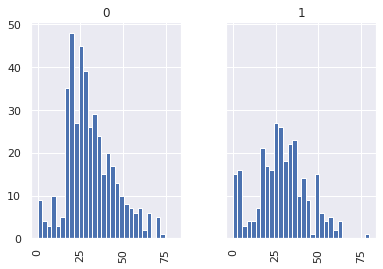

In [154]:
#Histogram of "Ages" grouped by "Surviving"
df.hist(column='Age', by='Survived', sharey=True, bins=30,  range=(0, df['Age'].max()))

In [155]:
#Adding a new column
df['AgeGroup'] = 0
df.loc[(df.Age<6), 'AgeGroup'] = 0
df.loc[(df.Age>=6) & (df.Age<11), 'AgeGroup'] = 1
df.loc[(df.Age>=11) & (df.Age<16), 'AgeGroup'] = 2
df.loc[(df.Age>=16) & (df.Age<60), 'AgeGroup'] = 3
df.loc[(df.Age>=60), 'AgeGroup'] = 4

In [156]:
df.groupby(['AgeGroup', 'Sex'])\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': 'Surviving %'})

Survived                      
                Passengers Surviving Surviving %
AgeGroup Sex                                    
0        female         74        52    0.702703
         male          147        31    0.210884
1        female         10         3    0.300000
         male           10         4    0.400000
2        female         12         9    0.750000
         male            7         2    0.285714
3        female        214       165    0.771028
         male          391        69    0.176471
4        female          4         4    1.000000
         male           22         3    0.136364

Text(0.5, 1.0, 'Passengers by AgeGroup')

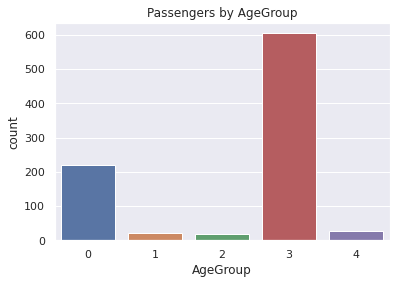

In [157]:
sns.countplot(x='AgeGroup', data=df).set_title("Passengers by AgeGroup")

Text(0.5, 1.0, 'Surviving passengers by AgeGroup')

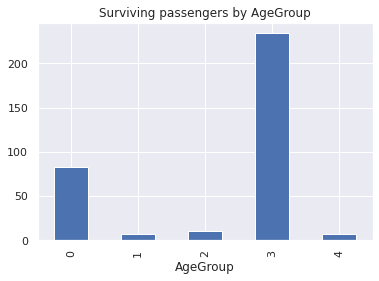

In [158]:
df.groupby('AgeGroup')['Survived'].sum().plot(kind='bar').set_title("Surviving passengers by AgeGroup")

Text(0.5, 1.0, 'Surviving % by AgeGroup')

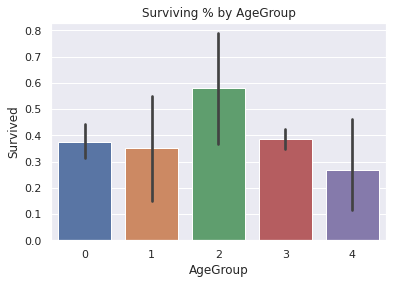

In [159]:
sns.barplot(x='AgeGroup', y='Survived', data=df).set_title("Surviving % by AgeGroup")

Text(0.5, 1.0, 'Surviving passengers by AgeGroup and Sex')

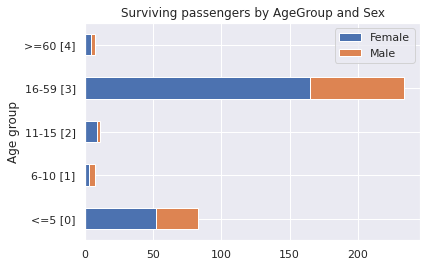

In [160]:
#Plot of "Surviving" people grouped by "AgeGroup" and "Sex"
ageGroup_labels = ['<=5 [0]', '6-10 [1]', '11-15 [2]', '16-59 [3]', '>=60 [4]']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Survived == 1').groupby(['AgeGroup','Sex']).size().unstack(['Sex']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(ageGroup_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Age group')
plt.set_title('Surviving passengers by AgeGroup and Sex')

In [161]:
df.groupby(['AgeGroup', 'Pclass'])\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': 'Surviving %'})

Survived                      
                Passengers Surviving Surviving %
AgeGroup Pclass                                 
0        1              33        16    0.484848
         2              24        17    0.708333
         3             164        50    0.304878
1        2               4         4    1.000000
         3              16         3    0.187500
2        1               3         3    1.000000
         2               2         2    1.000000
         3              14         6    0.428571
3        1             163       112    0.687117
         2             150        63    0.420000
         3             292        59    0.202055
4        1              17         5    0.294118
         2               4         1    0.250000
         3               5         1    0.200000

Text(0.5, 1.0, 'Surviving passengers by AgeGroup and Pclass')

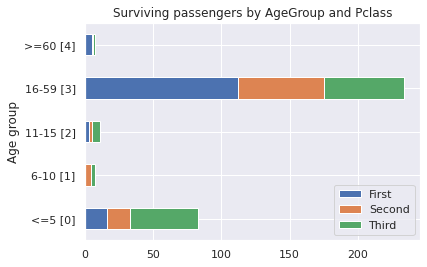

In [162]:
#Plot of "Surviving" people grouped by "AgeGroup" and "Pclass"
ageGroup_labels = ['<=5 [0]', '6-10 [1]', '11-15 [2]', '16-59 [3]', '>=60 [4]']
class_labels = {'First': 1, 'Second': 2, 'Third': 3}

plt = df.query('Survived == 1').groupby(['AgeGroup','Pclass']).size().unstack(['Pclass']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(ageGroup_labels)
plt.legend(labels=class_labels)

plt.set_ylabel('Age group')
plt.set_title('Surviving passengers by AgeGroup and Pclass')

##### Sex

In [163]:
df.groupby('Sex')\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': 'Surviving %'})

Survived                      
       Passengers Surviving Surviving %
Sex                                    
female        314       233    0.742038
male          577       109    0.188908

Text(0.5, 1.0, 'Passengers by sex')

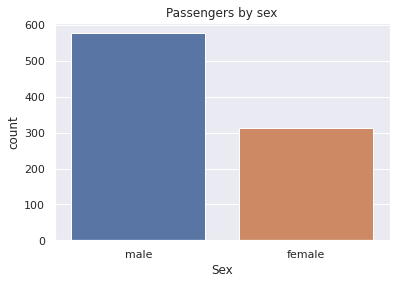

In [164]:
sns.countplot(x='Sex', data=df).set_title("Passengers by sex")

Text(0.5, 1.0, 'Surviving passengers by sex')

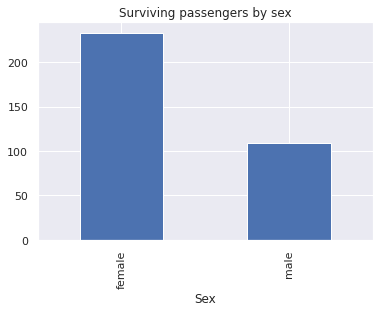

In [165]:
df.groupby('Sex')['Survived'].sum().plot(kind='bar').set_title("Surviving passengers by sex")

Text(0.5, 1.0, 'Surviving %')

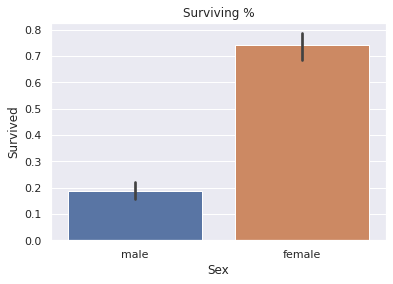

In [166]:
sns.barplot(x='Sex', y='Survived', data=df).set_title("Surviving %")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f072444fef0>,
      dtype=object)

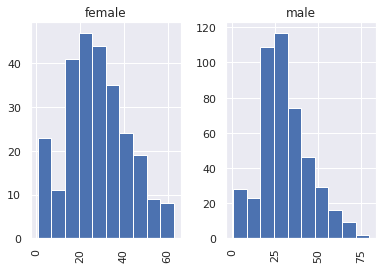

In [167]:
df.hist(column='Age', by='Sex')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f072443eeb8>,
      dtype=object)

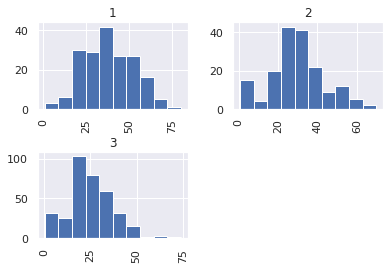

In [168]:
df.hist(column='Age', by='Pclass')

##### Pclass

In [169]:
df.groupby('Pclass')\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers p/class", 'sum': "Surviving", 'mean': "Surviving %", "Surviving": ""})

Survived                      
       Passengers p/class Surviving Surviving %
Pclass                                         
1                     216       136    0.629630
2                     184        87    0.472826
3                     491       119    0.242363

Text(0.5, 1.0, 'Passengers grouped by class')

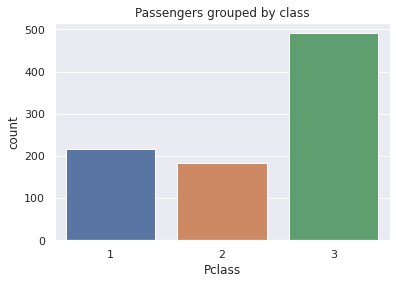

In [170]:
sns.countplot(x='Pclass', data=df).set_title("Passengers grouped by class")

Text(0.5, 1.0, 'Surviving passengers grouped by class')

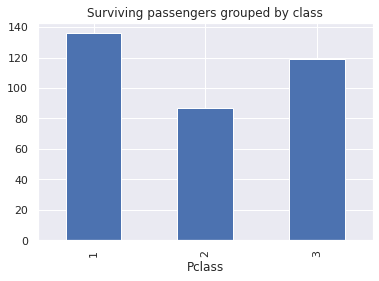

In [171]:
df.groupby('Pclass')['Survived'].sum().plot(kind='bar').set_title("Surviving passengers grouped by class")

Text(0.5, 1.0, 'Surviving % by class')

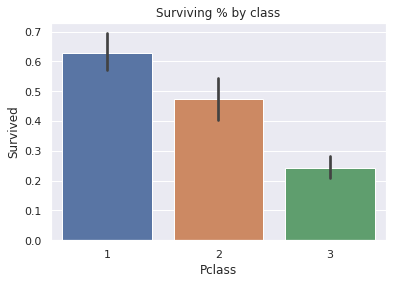

In [172]:
sns.barplot(x='Pclass', y='Survived', data=df).set_title("Surviving % by class")

In [173]:
df.groupby(['Pclass', 'Sex'])\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': "Surviving %", "Surviving": ""})

Survived                      
              Passengers Surviving Surviving %
Pclass Sex                                    
1      female         94        91    0.968085
       male          122        45    0.368852
2      female         76        70    0.921053
       male          108        17    0.157407
3      female        144        72    0.500000
       male          347        47    0.135447

Text(0.5, 1.0, 'Passenger class per sex')

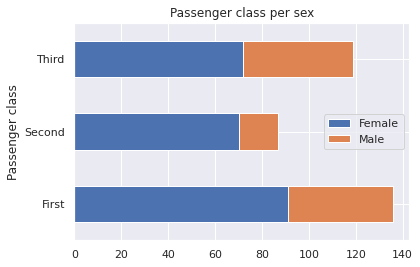

In [174]:
pclass_labels = ['First', 'Second', 'Third']
sex_labels = {'Female': 0, 'Male': 1}

plt = df.query('Survived == 1').groupby(['Sex','Pclass']).size().unstack(['Sex']).plot(kind='barh',
                                                            stacked=True, rot=0, subplots=False)
plt.set_yticklabels(pclass_labels)
plt.legend(labels=sex_labels)

plt.set_ylabel('Passenger class')
plt.set_title('Passenger class per sex')

##### Fare

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07240b9d30>,
      dtype=object)

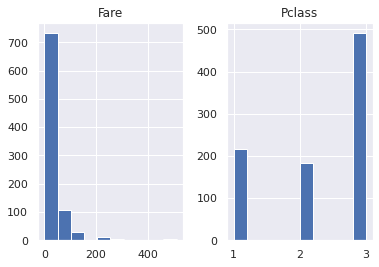

In [175]:
#Since there is a strong correlation between Pclass and Fare, let us show the distribution of both features
df.hist(['Pclass', 'Fare'])

Fare    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

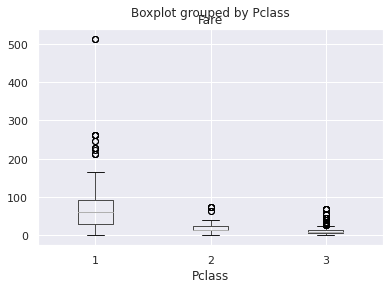

In [176]:
#Since the fare feature is righ skewed, let us detect outliers per Pclass
df.boxplot(column='Fare', by='Pclass', return_type='axes')

In [177]:
#Replacing the outliers with the second highest value
df.loc[df.Fare > 300, 'Fare'] = df['Fare'].sort_values(ascending=False).unique()[1]
df.sort_values('Fare', ascending=False).head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,263.000,NaN,C,3
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,3
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,3
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S,3
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,263.000,B101,C,3
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,4
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,263.000,B51 B53 B55,C,3
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,3


Fare    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

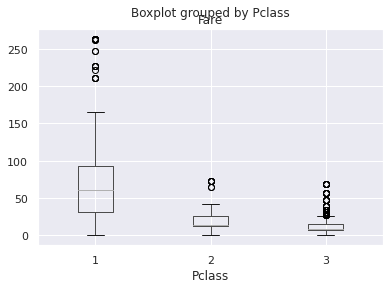

In [178]:
df.boxplot(column='Fare', by='Pclass', return_type='axes')

##### Embarked

In [179]:
df.groupby('Embarked')\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers p/port", 'sum': "Surviving", 'mean': "Surviving %", 'Surviving':" "})

Survived                      
         Passengers p/port Surviving Surviving %
Embarked                                        
C                      168        93    0.553571
Q                       77        30    0.389610
S                      644       217    0.336957

Text(0.5, 1.0, 'Passengers by Port')

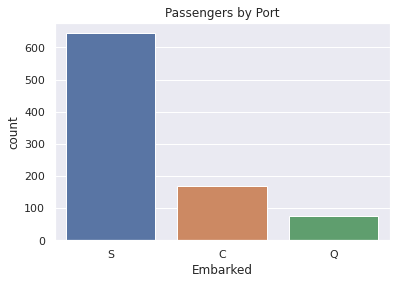

In [180]:
sns.countplot(x='Embarked', data=df).set_title("Passengers by Port")

Text(0.5, 1.0, 'Surviving passenger % by port')

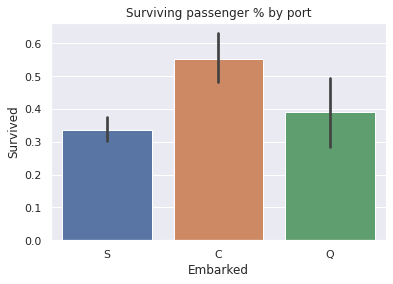

In [181]:
sns.barplot(x='Embarked', y='Survived', data=df).set_title("Surviving passenger % by port")

In [182]:
df.groupby(['Embarked', 'Sex'])\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers p/port", 'sum': "Surviving", 'mean': "Surviving %", "Surviving": ""})

Survived                      
                Passengers p/port Surviving Surviving %
Embarked Sex                                           
C        female                73        64    0.876712
         male                  95        29    0.305263
Q        female                36        27    0.750000
         male                  41         3    0.073171
S        female               203       140    0.689655
         male                 441        77    0.174603

Text(0.5, 1.0, 'Surviving passengers % by port and sex')

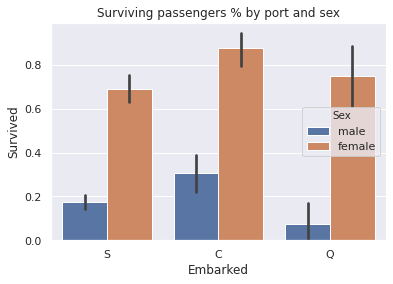

In [183]:
sns.barplot(x='Embarked', y='Survived', hue= 'Sex', data=df).set_title("Surviving passengers % by port and sex")

##### SibSp

In [184]:
df.groupby(['SibSp', 'Sex'])\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': "Surviving %", "Surviving": ""})

Survived                      
             Passengers Surviving Surviving %
SibSp Sex                                    
0     female        174       137    0.787356
      male          434        73    0.168203
1     female        106        80    0.754717
      male          103        32    0.310680
2     female         13        10    0.769231
      male           15         3    0.200000
3     female         11         4    0.363636
      male            5         0    0.000000
4     female          6         2    0.333333
      male           12         1    0.083333
5     female          1         0    0.000000
      male            4         0    0.000000
8     female          3         0    0.000000
      male            4         0    0.000000

Text(0.5, 1.0, 'Passenger by number os SibSp')

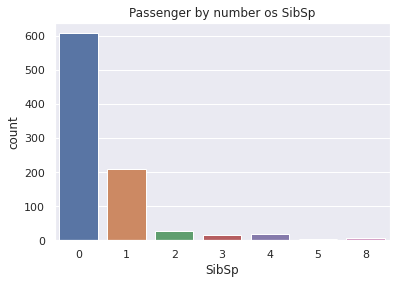

In [185]:
sns.countplot(x='SibSp', data=df).set_title("Passenger by number os SibSp")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f071fcef550>,
      dtype=object)

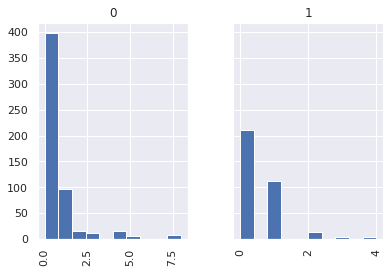

In [186]:
df.hist(column='SibSp', by='Survived', sharey=True)

Text(0.5, 1.0, 'Surviving passengers% by sex and SibSp')

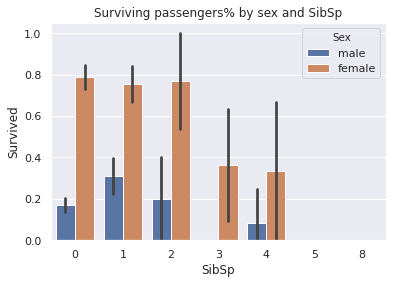

In [187]:
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=df).set_title("Surviving passengers% by sex and SibSp")

In [188]:
df.groupby(['SibSp', 'Sex']).Age.mean()

SibSp  Sex   
0      female    28.631944
       male      32.615443
1      female    30.738889
       male      29.461505
2      female    16.541667
       male      28.230769
3      female    16.500000
       male       8.750000
4      female     8.333333
       male       6.416667
5      female    16.000000
       male       8.750000
8      female          NaN
       male            NaN
Name: Age, dtype: float64

Text(0.5, 1.0, 'Number of SibSp by age and sex')

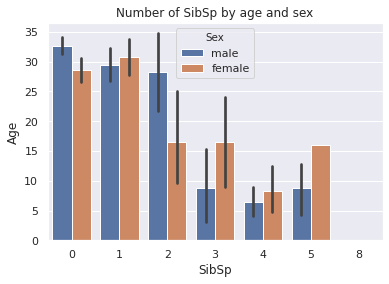

In [189]:
sns.barplot(x='SibSp', y='Age', hue='Sex', data=df).set_title("Number of SibSp by age and sex")

In [190]:
df.groupby(['SibSp', 'Pclass']).Survived.mean()

SibSp  Pclass
0      1         0.562044
       2         0.416667
       3         0.236467
1      1         0.746479
       2         0.581818
       3         0.325301
2      1         0.800000
       2         0.500000
       3         0.333333
3      1         0.666667
       2         1.000000
       3         0.083333
4      3         0.166667
5      3         0.000000
8      3         0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Surviving passengers % by class and sex')

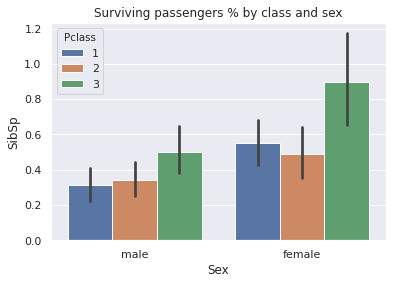

In [191]:
sns.barplot(x='Sex', y='SibSp', hue='Pclass', data=df).set_title("Surviving passengers % by class and sex")

##### ParCh

In [192]:
df.groupby('Parch')\
    .agg({'Survived': [np.size, np.sum, np.mean]})\
    .rename(columns={'size': "Passengers", 'sum': "Surviving", 'mean': "Surviving %", "Surviving": ""})

Survived                      
      Passengers Surviving Surviving %
Parch                                 
0            678       233    0.343658
1            118        65    0.550847
2             80        40    0.500000
3              5         3    0.600000
4              4         0    0.000000
5              5         1    0.200000
6              1         0    0.000000

Text(0.5, 1.0, 'Passengers by ParCh')

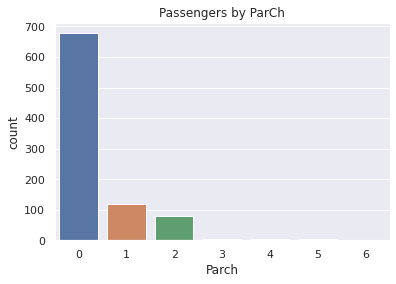

In [193]:
sns.countplot(x='Parch', data=df).set_title("Passengers by ParCh")

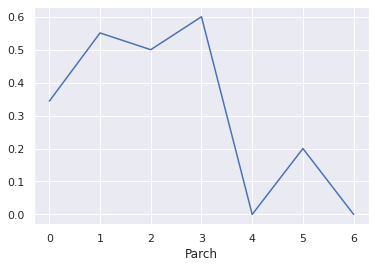

In [194]:
df.groupby('Parch').Survived.mean().plot()

In [195]:
df.groupby(['Pclass', 'Sex', 'Parch'])['Parch', 'SibSp', 'Survived']\
    .agg({'Parch': np.size, 'SibSp': np.mean, 'Survived': np.mean})\
    .rename(columns={'Survived': "Surviving %"})

/home/lereyes/Documentos/personal/sitc-master-20200325T154247Z-001/sitc-master/ml1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Parch     SibSp  Surviving %
Pclass Sex    Parch                              
1      female 0         64  0.484375     0.984375
              1         17  0.411765     1.000000
              2         13  1.076923     0.846154
       male   0         99  0.262626     0.363636
              1         14  0.357143     0.285714
              2          8  0.750000     0.625000
              4          1  1.000000     0.000000
2      female 0         45  0.333333     0.888889
              1         18  0.722222     0.944444
              2         11  0.545455     1.000000
              3          2  1.500000     1.000000
       male   0         89  0.224719     0.089888
              1         14  1.071429     0.500000
              2          5  0.400000     0.400000
3      female 0         85  0.341176     0.588235
              1         25  1.240000     0.480000
              2         25  2.560000     0.320000
              3          2  0.500000     0.500000
              4          2  0.500000     0.000000
              5          4  0.500000     0.250000
              6          1  1.000000     0.000000
       male   0        296  0.135135     0.121622
              1         30  1.900000     0.266667
              2         18  4.055556     0.166667
              3          1  1.000000     0.000000
              4          1  1.000000     0.000000
              5          1  1.000000     0.000000

In [196]:
df.query('(Sex == "male") and (Pclass == [1, 2]) and (Parch == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.439024
Age         27.871951
dtype: float64

In [197]:
df.query('(Sex == "male") and (Pclass == [1, 2])')[['Survived', 'Age']].mean()

Survived     0.269565
Age         36.063750
dtype: float64

#### 2.1.2 Preprocessing

In [198]:
df_modified = df.copy()

In [199]:
df_modified.fillna(df_modified.groupby('Embarked').size().sort_values(ascending=False).index[0], inplace=True)

In [200]:
df_modified = pd.get_dummies(df, columns=['Embarked', 'Pclass'])

In [201]:
#Since the original DF is rightly skewed, we are going to fill all NaN values with the median
df_modified['Age'] = df_modified['Age'].fillna(df['Age'].median())

In [202]:
#Dropping not important columns
df_modified.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [203]:
#Enconding "Sex" feature
for sex in df_modified['Sex'].unique():
    if sex == "male":
        df_modified.loc[df_modified["Sex"] == "male", "Sex"] = 0
    else:
        df_modified.loc[df_modified["Sex"] == "female", "Sex"] = 1

In [204]:
df_modified.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,AgeGroup,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0,22.0,1,0,7.2500,3,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,3,1,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,3,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,3,0,0,1,1,0,0
4,5,0,0,35.0,0,0,8.0500,3,0,0,1,0,0,1


In [205]:
df_modified.isnull().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
AgeGroup       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

## 3. Machine Learning

In [206]:
#imports
from pandas import Series, DataFrame

#Training & test splitting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Estimators
from sklearn.svm import SVC

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from scipy.stats import sem

#Optimization
from sklearn.model_selection import GridSearchCV

%run util_ds

<Figure size 432x288 with 0 Axes>

### 3.1 Train & Test splitting

In [207]:
features = ['Sex', 'AgeGroup', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
            'Embarked_Q', 'Embarked_S']

In [208]:
X = df_modified[features].values
y = df_modified['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

### 3.2 Normalizing

In [209]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3.3 kNN

In [210]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### 3.3.1 Evaluation

In [211]:
y_test_pred = knn_model.predict(X_test)
print("Test prediction accuray", metrics.accuracy_score(y_test_pred, y_test))

Test prediction accuray 0.8295964125560538


In [212]:
roc_auc_score(y_test, y_test_pred)

0.8034965621331545

In [213]:
model = Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('kNN', knn_model)
])

cv = KFold(5, shuffle=True, random_state=33)

scores = cross_val_score(model, X, y, cv=cv)
print(scores)

[0.82122905 0.80337079 0.79775281 0.74157303 0.80898876]


In [214]:
#Mean score
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))
print(mean_score(scores))

Mean score: 0.795 (+/- 0.014)


In [215]:
# Precision, recall and f1-score
print("Test report\n",metrics.classification_report(y_test, y_test_pred))

Test report
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       134
           1       0.87      0.67      0.76        89

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



In [216]:
#Confussion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[125   9]
 [ 29  60]]


#### 3.3.2 Tunning

In [218]:
model.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('kNN',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                        weights='uniform'))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'kNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                      weights='uniform'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'kNN__algorithm': 'auto',
 'kNN__leaf_size': 30,
 'kNN__metric': 'minkowski',
 'kNN__metric_params': None,
 'kNN__n_jobs': None,
 'kNN__n_neighbors': 10,
 'kNN__p': 2,
 'kNN__weights': 'uniform'}

In [219]:
leaf_size = list(range(1,30))
n_neighbors = list(range(1,20))
weights = ['uniform', 'distance']
p = [1,2]

hparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, weights=weights, p=p)

In [220]:
gs= GridSearchCV(KNeighborsClassifier(), hparameters, verbose=1, cv=5)
gs_result = gs.fit(X, y)

Fitting 5 folds for each of 2204 candidates, totalling 11020 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11020 out of 11020 | elapsed:   48.6s finished


In [221]:
print(gs_result.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='distance')


In [222]:
algorithm = gs_result.best_estimator_.get_params()['algorithm']
leaf_size = gs_result.best_estimator_.get_params()['leaf_size']
metric = gs_result.best_estimator_.get_params()['metric']
n_neighbors = gs_result.best_estimator_.get_params()['n_neighbors']
p = gs_result.best_estimator_.get_params()['p']
weights = gs_result.best_estimator_.get_params()['weights']

In [223]:
knn_model_tunned = KNeighborsClassifier(algorithm=algorithm, leaf_size=leaf_size, metric=metric,
                                   n_neighbors=n_neighbors, p=p, weights=weights)
knn_model_tunned.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='distance')

##### 3.3.2.1 Evaluating tunned model

In [224]:
y_test_pred_tunned = knn_model_tunned.predict(X_test)
print("Test prediction accuray", metrics.accuracy_score(y_test_pred_tunned, y_test))

Test prediction accuray 0.8430493273542601


In [225]:
roc_auc_score(y_test, y_test_pred_tunned)

0.8316703001844709

In [226]:
tunned_model = Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('kNN', knn_model_tunned)
])

cv = KFold(5, shuffle=True, random_state=33)

tunned_scores = cross_val_score(tunned_model, X, y, cv=cv)
print(tunned_scores)

[0.82122905 0.8258427  0.76404494 0.78089888 0.8258427 ]


In [227]:
print(mean_score(tunned_scores))

Mean score: 0.804 (+/- 0.013)


In [228]:
print("Test report\n",metrics.classification_report(y_test, y_test_pred_tunned))

Test report
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       134
           1       0.82      0.78      0.80        89

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



In [229]:
#Confussion matrix
print(metrics.confusion_matrix(y_test, y_test_pred_tunned))

[[119  15]
 [ 20  69]]


### 3.4 Decision Tree

In [ ]:
#Creating a decision tree model
dt_model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 1)

#Training the model using the training sets
dt_model.fit(x_train, y_train)

#### 3.4.1 Evaluation

In [ ]:
y_train_pred = dt_model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))

In [ ]:
y_test_pred = dt_model.predict(x_test)
print("Accuracy in testing", metrics.accuracy_score(y_test, y_test_pred))

In [ ]:
print(dt_model.feature_importances_)

In [ ]:
print("Test report\n",metrics.classification_report(y_test, y_test_pred))


In [ ]:
print(metrics.confusion_matrix(y_test, y_test_pred))

In [ ]:
dt_pipeline = Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('DecisionTree', dt_model)
])

cv = KFold(10, shuffle=True, random_state=33)

scores_dt = cross_val_score(dt_pipeline, x, y, cv=cv)
print(scores_dt)

In [ ]:
print(mean_score(scores_dt))

#### 3.4.2 Tunning

In [ ]:
tuned_parameters = [{'max_depth': np.arange(3, 10),
                     'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'],
                     'min_samples_leaf': [2, 5, 10],
                     'class_weight':['balanced', None],
                     'max_leaf_nodes': [None, 5, 10, 20]
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10, scoring='%s_weighted' % score)
    gs.fit(x_train, y_train)
    
    print(gs.best_score_)
    print(gs.scoring)

    print("Best parameters set found on development set:\n")
    print(gs.best_params_, "\n")
    print("Detailed classification report:\n")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(x_test)
    print(metrics.classification_report(y_true, y_pred))
    print()

In [ ]:
model = Pipeline([
        ('scaler', preprocessing.StandardScaler()),
        ('ds', tree.DecisionTreeClassifier(max_depth=5, 
                                           criterion='gini', 
                                           min_samples_leaf=5, 
                                           splitter='best'))
])

# Fit the model
model.fit(x_train, y_train) 

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x, y, cv=cv)

print(mean_score(scores))